### Libraries

In [1]:
!pip install -q xgboost

In [2]:
import pickle
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
from scipy.stats import shapiro

C:\Users\Elisa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Elisa\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Upload dataset

In [3]:
df = pd.read_csv('sensors-dataset.csv')

In [4]:
df.shape

(11500, 179)

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target_variable
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


### Explory Analysis

In [6]:
# brief stats
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target_variable
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [7]:
print("Number of columns:", len(df.columns))

Number of columns: 179


In [8]:
# checking null values
df.isna().sum().sum()

0

#### Checking Positive Class Prevalence

Prevalence is the percentage of samples that have the characteristic we're trying to predict. In this specific scenario, it means that machines that required maintenance represent the positive class (event occurrence), while those that did not require maintenance represent the negative class (event non-occurrence).

The rate is calculated by (number of positive samples / number of samples). Therefore, a prevalence rate of 0.2 means that 20% of our sample are machines that required maintenance.

In [9]:
def df_prevalence(y_actual):
    return sum(y_actual ) / len(y_actual)

In [10]:
print("Class Positive Prevalence: %.3f"% df_prevalence(df["target_variable"].values))

Class Positive Prevalence: 0.200


### Data cleaning

In [11]:
# why?
collist = df.columns.tolist()
cols_input = collist[0:178]
df_data = df[cols_input + ["target_variable"]]

In [12]:
df_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target_variable
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [13]:
# checking duplicate data
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "there are duplicate columns"

set()


In [14]:
cols_df_data = list(df_data.columns)
dup_cols= set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "there are duplicate columns"

set()


### Data Pre-Processing
#### Data division at trainnig, validation and test

<br> df_train = train machine learning algorithm and represents the majority of dataset volume
<br> df_test = will be used to adjust hyperparameters and select best perform
<br> df_valid = will be used to test the accuracy of ML algorithm

In [15]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target_variable
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [16]:
# creating random samples
df_data = df_data.sample(n = len(df_data))

In [17]:
# Adjusting dataset index
df_data = df_data.reset_index(drop = True)

In [18]:
# Creating an index for the split
df_valid_test = df_data.sample(frac = 0.3)
print("Validation split size / test: %.1f" % (len(df_valid_test) / len(df_data)))

Validation split size / test: 0.3


In [19]:
# Splitting dataset: 70/15/15

df_test = df_valid_test.sample(frac = 0.5)
df_valid = df_valid_test.drop(df_test.index)
df_train = df_data.drop(df_valid_test.index)

In [20]:
# Checking prevalence in each subset
print("Test(n = %d): %.3f" % (len(df_test), df_prevalence(df_test.target_variable.values)))
print("Validation(n = %d): %.3f" % (len(df_valid), df_prevalence(df_valid.target_variable.values)))
print("Train(n = %d): %.3f" % (len(df_train), df_prevalence(df_valid.target_variable.values)))


Test(n = 1725): 0.200
Validation(n = 1725): 0.202
Train(n = 8050): 0.202


In [21]:
print('All samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test) + len(df_valid) + len(df_train)), 'something got wrong'

All samples (n = 11500)


#### Class balacing

target_variable
0    9200
1    2300
Name: count, dtype: int64

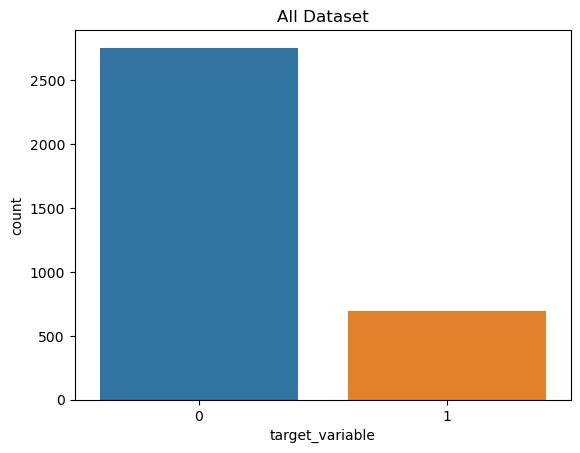

In [22]:
# Checking balance of target_variable column for all dataset
plt.title("All Dataset")
ax = sns.countplot(x="target_variable", data=df_valid_test)
df["target_variable"].value_counts()

#### Applying balance class only in train subset

For class balancing, the undersampling technique will be used. 
This technique involves reducing the number of examples from the majority class to equal the number of examples from the minority class. In other words, you reduce the size of the dataset by randomly removing records from the class that has more examples. This can help balance the dataset, but it can also result in the loss of important information, as much data from the majority class is discarded.

In [23]:
# Creating an index
rows_pos = df_train.target_variable == 1

In [24]:
#Define positive and negative values of index
df_train_pos = df_train[rows_pos]
df_train_neg = df_train[~rows_pos]

In [25]:
# Minimum value
n = np.min([len(df_train_pos), len(df_train_neg)])

In [26]:
# Obtain random values for train dataset
df_train_final = pd.concat([df_train_pos.sample (n = n, random_state = 64),
                            df_train_neg.sample (n = n, random_state = 64)],
                           axis = 0,
                           ignore_index = True)

In [27]:
# Sampling
df_train_final = df_train_final.sample(n = len(df_train_final), random_state = 64).reset_index(drop = True)

In [28]:
print('Train balancing (n = %d): %.3f'%(len(df_train_final), 
                                        df_prevalence(df_train_final.target_variable.values)))

Train balancing (n = 3214): 0.500


In [29]:
# Saving all subset in disk
df_train.to_csv('train_dataset.csv', index = False)
df_train_final.to_csv('train_final_dataset.csv', index = False)
df_valid.to_csv('valid_dataset.csv', index = False)
df_test.to_csv('test_dataset.csv', index = False)

In [30]:
# Saving input data (predict columns) to make it easier to use later
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

#### Creating matrix x and Y

In [31]:
# X
X_train = df_train_final[cols_input].values
X_valid = df_valid[cols_input].values

In [32]:
# Y
Y_train = df_train_final['target_variable'].values
Y_valid = df_valid['target_variable'].values

In [33]:
print('Shape train dataset:' , X_train.shape, Y_train.shape)
print('Shape valid dataset:' , X_valid.shape, Y_valid.shape)

Shape train dataset: (3214, 178) (3214,)
Shape valid dataset: (1725, 178) (1725,)


In [34]:
X_train

array([[  64,   45,   21, ...,   67,   59,   48],
       [ 169,  118,   47, ...,  -11,  -17,  -19],
       [ 285,  282,  311, ...,  -22, -173, -308],
       ...,
       [ -11,   16,   22, ...,  -66,  -60,  -59],
       [ -95, -129, -168, ..., -369, -156,   90],
       [  41,   35,   33, ...,   51,   61,   62]], dtype=int64)

#### Standardization

In [35]:
# creating object
scaler = StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
# saving object in disk
scalerfile = 'scaler.sav'

In [38]:
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

In [39]:
# Applying standardization in matrix
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [40]:
X_train_tf

array([[ 0.35170196,  0.26540579,  0.15935019, ...,  0.36112579,
         0.32844825,  0.27530301],
       [ 0.77798708,  0.56129433,  0.26690159, ...,  0.03979524,
         0.0093281 , -0.0031356 ],
       [ 1.24893064,  1.22603022,  1.35896198, ..., -0.0055206 ,
        -0.64570802, -1.20416182],
       ...,
       [ 0.04721259,  0.14786103,  0.16348678, ..., -0.18678398,
        -0.17122673, -0.1693676 ],
       [-0.29381551, -0.43986277, -0.62246578, ..., -1.43502955,
        -0.57432588,  0.44984661],
       [ 0.25832522,  0.22487312,  0.2089893 , ...,  0.29521183,
         0.33684615,  0.33348421]])

### Data Modeling Predictive

The following metrics are commonly used to evaluate the performance of classification models in machine learning. Each of them provides different information about the quality of the model’s predictions. Let’s describe them:

**AUC (Area Under the ROC Curve)**: The AUC metric refers to the area under the ROC (Receiver Operating Characteristic) curve. The ROC curve is a graph that shows the performance of a classification model across classification thresholds. This curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different thresholds. AUC ranges from 0 to 1, where a model with an AUC of 1 is a perfect classifier, and a model with an AUC of 0.5 has no classification ability better than chance.

**Accuracy**: Accuracy is the fraction of correct predictions (both true positives and true negatives) among the total cases examined. It is calculated as (true positives + true negatives) / (total cases). While accuracy can provide a quick measure of the overall effectiveness of the model, it can be misleading in imbalanced datasets where one class is much more frequent than the other.

**Recall**: Recall is the proportion of true positives that were correctly identified by the model, calculated as (true positives) / (true positives + false negatives). It is an important metric when the cost of missing a true positive is high.

**Precision**: Precision is the proportion of positive predictions that are actually positive, calculated as (true positives) / (true positives + false positives). High precision indicates a low false positive rate. It is particularly important in situations where false positives have a high cost.

**Specificity**: Specificity is the proportion of true negatives that were correctly identified as such, calculated as (true negatives) / (true negatives + false positives). It is not directly calculated by scikit-learn, but can be derived from the confusion matrix or calculated by a custom function such as the mentioned dsa_calc_specificity. Specificity is crucial in contexts where it is important to minimize

In [41]:
# Creating functions to calculate metrics

In [42]:
# Function to calculate specificity
def calc_specificity(y_actual, y_pred, tresh):
    return sum((y_pred < tresh) & (y_actual == 0)) / sum(y_actual == 0)

In [43]:
# Function to genarete metric report
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    
    recall = recall_score(y_actual, (y_pred > thresh))
    
    precision = precision_score(y_actual, (y_pred > thresh))
    
    specificity = calc_specificity(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('Accuracy:%.3f'%accuracy)
    print('Recal:%.3f'%recall)
    print('Precision:%.3f'%precision)
    print('Specificity:%.3f'%specificity)
    print('')
    
    return auc, accuracy, recall, precision, specificity

Since we have balanced our training data, let's set our threshold to 0.5 to label a predicted sample as positive.

In [44]:
thresh = 0.5

#### Option 1 - Logistic Regression
The logistic regression algorithm is a machine learning technique used to predict a binary outcome. This means that it is used to decide between two possible options, such as yes or no, true or false, success or failure.

The algorithm works by calculating the probability of an event occurring based on observed characteristics in the data. For example, logistic regression can be used to predict whether or not a customer will purchase a product, based on their purchase history and other personal characteristics. It is an easy-to-understand and very powerful model.

In [45]:
# Creating classifier (object)
lr = LogisticRegression(max_iter = 500, random_state = 142)

# Trainning and creating the model
model_v1 = lr.fit(X_train_tf, Y_train)

# Predictions

y_train_preds = model_v1.predict_proba(X_train_tf)[:,1]
y_valid_preds = model_v1.predict_proba(X_valid_tf)[:,1]

print('\nLogistic Regression')

print('\nTrainning:\n')

v1_train_auc, v1_train_acc, v1_train_rec, v1_train_prec, v1_train_spec = print_report(Y_train, y_train_preds,thresh)

print('Validation: \n')
v1_valid_auc, v1_valid_acc, v1_valid_rec, v1_valid_prec, v1_valid_spec = print_report(Y_valid, y_valid_preds,thresh)



Logistic Regression

Trainning:

AUC:0.608
Accuracy:0.643
Recal:0.519
Precision:0.689
Specificity:0.766

Validation: 

AUC:0.548
Accuracy:0.689
Recal:0.457
Precision:0.314
Specificity:0.747



#### Option 2 - Probabilistic Model
The Gaussian Naive Bayes algorithm is a classification method based on Bayes' theorem, with the assumption that the predictors (input features) have a normal (Gaussian) distribution. It is called "naive" because it assumes that all features are independent of each other, which is rarely the case in practice but greatly simplifies the computation. This algorithm is effective on classification problems where the features are continuous and presumably have a normal distribution, such as in some text classification tasks and medical diagnosis problems. It calculates the probability of each output category based on the input features, and classifies each instance into the category with the highest probability.

In [46]:
#Checking if dataset train is a normal distribution

data = df_train_final
stats, p = shapiro(data)
print(f'Shapiro wilk stat is: {stats:.4f}')
print(f'P of Shapiro wilk stat is: {p:.3f}')

Shapiro wilk stat is: 0.8520
P of Shapiro wilk stat is: 0.000


C:\Users\Elisa\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [47]:
# Creating classifier (object)
nb = GaussianNB()

# Trainning and creating the model
model_v2 = nb.fit(X_train_tf, Y_train)

# Predictions

y_train_preds = model_v2.predict_proba(X_train_tf)[:,1]
y_valid_preds = model_v2.predict_proba(X_valid_tf)[:,1]

print('\nLogistic Regression')

print('\nTrainning:\n')

v2_train_auc, v2_train_acc, v2_train_rec, v2_train_prec, v2_train_spec = print_report(Y_train, y_train_preds,thresh)

print('Validation: \n')
v2_valid_auc, v2_valid_acc, v2_valid_rec, v2_valid_prec, v2_valid_spec = print_report(Y_valid, y_valid_preds,thresh)



Logistic Regression

Trainning:

AUC:0.986
Accuracy:0.942
Recal:0.907
Precision:0.976
Specificity:0.978

Validation: 

AUC:0.980
Accuracy:0.952
Recal:0.908
Precision:0.861
Specificity:0.963



#### Option 3 - Decision Tree and Boosting

The XGBoost (eXtreme Gradient Boosting) algorithm is an advanced implementation of decision trees with boosting techniques, which are machine learning methods for improving prediction accuracy. XGBoost builds models sequentially, with each new model trying to correct the errors of the previous one, focusing on the instances that were most difficult to predict correctly.

The main advantage of XGBoost is its ability to efficiently manage large volumes of data and handle a variety of data types, being very efficient in terms of runtime and memory usage. It also has features that allow it to handle missing values ​​and supports multiple loss functions, which makes it suitable for a wide range of classification and regression problems.

In addition, XGBoost offers several functionalities to improve model performance and accuracy, such as regularization to avoid overfitting, and tree pruning techniques. It is widely used in data science competitions and in industrial applications due to its robustness and effectiveness.

In [48]:
# Creating classifier (object)
xgbc = XGBClassifier()

# Trainning and creating the model
model_v3 = xgbc.fit(X_train_tf, Y_train)

# Predictions

y_train_preds = model_v3.predict_proba(X_train_tf)[:,1]
y_valid_preds = model_v3.predict_proba(X_valid_tf)[:,1]

print('\nLogistic Regression')

print('\nTrainning:\n')

v3_train_auc, v3_train_acc, v3_train_rec, v3_train_prec, v3_train_spec = print_report(Y_train, y_train_preds,thresh)

print('Validation: \n')
v3_valid_auc, v3_valid_acc, v3_valid_rec, v3_valid_prec, v3_valid_spec = print_report(Y_valid, y_valid_preds,thresh)



Logistic Regression

Trainning:

AUC:1.000
Accuracy:1.000
Recal:1.000
Precision:1.000
Specificity:1.000

Validation: 

AUC:0.990
Accuracy:0.958
Recal:0.945
Precision:0.859
Specificity:0.961



### Cross Validation

Cross-validation is a model evaluation technique that aims to ensure the generalization ability of a predictive model to an independent data set. This method is used to estimate the ability of the model to perform on data not seen during training, minimizing problems such as overfitting. In cross-validation, the data set is divided into smaller parts: one set is used to train the model (training data) and the other is used to test the model (test or validation data). The process is repeated multiple times (folds) with different training and testing partitions, and the results are then aggregated to provide a more robust measure of the model's performance.

One of the most common cross-validation methods is k-fold cross-validation, where the data set is randomly divided into k parts (or "folds") of approximately the same size. The model is trained k times, each time using k-1 folds for training and the remaining fold for testing, ensuring that each fold is used exactly once as test data. This allows all data to be used for both training and testing, maximizing the efficiency of using the available data. Cross-validation provides a more accurate estimate of model performance than simply splitting the data into training and testing sets, especially in cases of limited or imbalanced datasets.

To perform cross-validation on the Xtreme Gradient Boosting Classifier (XGBClassifier) ​​model, you can use the cross_val_score function from the scikit-learn library. This function allows you to evaluate the effectiveness of the model using different training/testing splits, which helps to obtain a more robust estimate of model performance.

In [49]:
# creating classifier
xgbc = XGBClassifier()

# Setting up cross validation with 5 divisions and ROC (AUC) metric
n_splits = 5
score = 'roc_auc'

# Cross validation
cv_scores = cross_val_score(xgbc, X_train_tf, Y_train, cv = n_splits, scoring = score)

# Show results

print(f"Cross Validation with {n_splits} divisões")
print(f"Score AUC for each division: {cv_scores}")
print(f"Score AUC average: {np.mean(cv_scores)}")

Cross Validation with 5 divisões
Score AUC for each division: [0.99485304 0.99376947 0.99450475 0.99066388 0.99012044]
Score AUC average: 0.9927823158616051


### Hyperparameter Optimization with GridSearchCV

To perform hyperparameter optimization on your XGBoost model, you can use GridSearchCV or RandomizedSearchCV from the scikit-learn library. These tools allow you to automatically test several hyperparameter combinations and select the best combination based on the model's performance.

Here we will show you how to use GridSearchCV to optimize some XGBoost hyperparameters. The process with RandomizedSearchCV 
would be similar, but with the difference that it tests a fixed number of randomly chosen hyperparameter combinations, which can be more efficient if the hyperparameter space is very large.

In [50]:
%%time

# Define classifier
xgbc = XGBClassifier()

# Define hyperparameters for optimization
param_grid = {
    'max_depth': [3 ,4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsmaple': [0.7, 0.8, 0.9]    
}

# Setting up GridSearchCV
grid_search = GridSearchCV(xgbc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)

# Searching best hyperparameters
grid_search.fit(X_train_tf, Y_train)

# Best hyperparameters found
best_params = grid_search.best_params_

# Trainning model with best hupyparameters
model_v4 = grid_search.best_estimator_

# Predict with optimized model
y_train_preds_optimized = model_v4.predict_proba(X_train_tf)[:,1]
y_valid_preds_optimized = model_v4.predict_proba(X_valid_tf)[:,1]

# Evaluating optimized model:
print('\nXtreme Gradient Boosting Classifier - Optimized\n')
print('Best hyperparameters')

print('\nTrainning:\n')
v4_train_auc, v4_train_acc, v4_train_rec, v4_train_prec, v4_train_spec = print_report(Y_train, y_train_preds_optimized, thresh)

print('\nValidation:\n')
v4_valid_auc, v4_valid_acc, v4_valid_rec, v4_valid_prec, v4_valid_spec = print_report(Y_valid, y_valid_preds_optimized, thresh)


C:\Users\Elisa\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:55:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "subsmaple" } are not used.

  warnings.warn(smsg, UserWarning)



Xtreme Gradient Boosting Classifier - Optimized

Best hyperparameters

Trainning:

AUC:1.000
Accuracy:1.000
Recal:1.000
Precision:1.000
Specificity:1.000


Validation:

AUC:0.992
Accuracy:0.961
Recal:0.945
Precision:0.870
Specificity:0.964

Wall time: 10min 38s


### Selecting the Best Machine Learning Model

In [51]:
# Creating dataframe with metrics calculated
df_results = pd.DataFrame({'Classifier': ['RL', 'RL', 'NB', 'NB', 'XGB', 'XGB', 'XGB_O', 'XGB_O'],
                          'data_set': ['trainning', 'validation'] * 4,
                          'auc':[v1_train_auc,
                                  v1_valid_auc,
                                  v2_train_auc,
                                  v2_valid_auc,
                                  v3_train_auc,
                                  v3_valid_auc,
                                  v4_train_auc,
                                  v4_valid_auc],
                           'accuracy':[v1_train_acc,
                                       v1_valid_acc,
                                       v2_train_acc,
                                       v2_valid_acc,
                                       v3_train_acc,
                                       v3_valid_acc,
                                       v4_train_acc,
                                       v4_valid_acc],
                           'recall':[v1_train_rec,
                                     v1_valid_rec,
                                     v2_train_rec,
                                     v2_valid_rec,
                                     v3_train_rec,
                                     v3_valid_rec,
                                     v4_train_rec,
                                     v4_valid_rec],
                           'precision':[v1_train_prec,
                                        v1_valid_prec,
                                        v2_train_prec,
                                        v2_valid_prec,
                                        v3_train_prec,
                                        v3_valid_prec,
                                        v4_train_prec,
                                        v4_valid_prec],
                           'specificity':[v1_train_spec,
                                          v1_valid_spec,
                                          v2_train_spec,
                                          v2_valid_spec,
                                          v3_train_spec,
                                          v3_valid_spec,
                                          v4_train_spec,
                                          v4_valid_spec]})

The performance metric chosen will be the AUC score of the validation set. It is the ideal score to compare models from different algorithms.

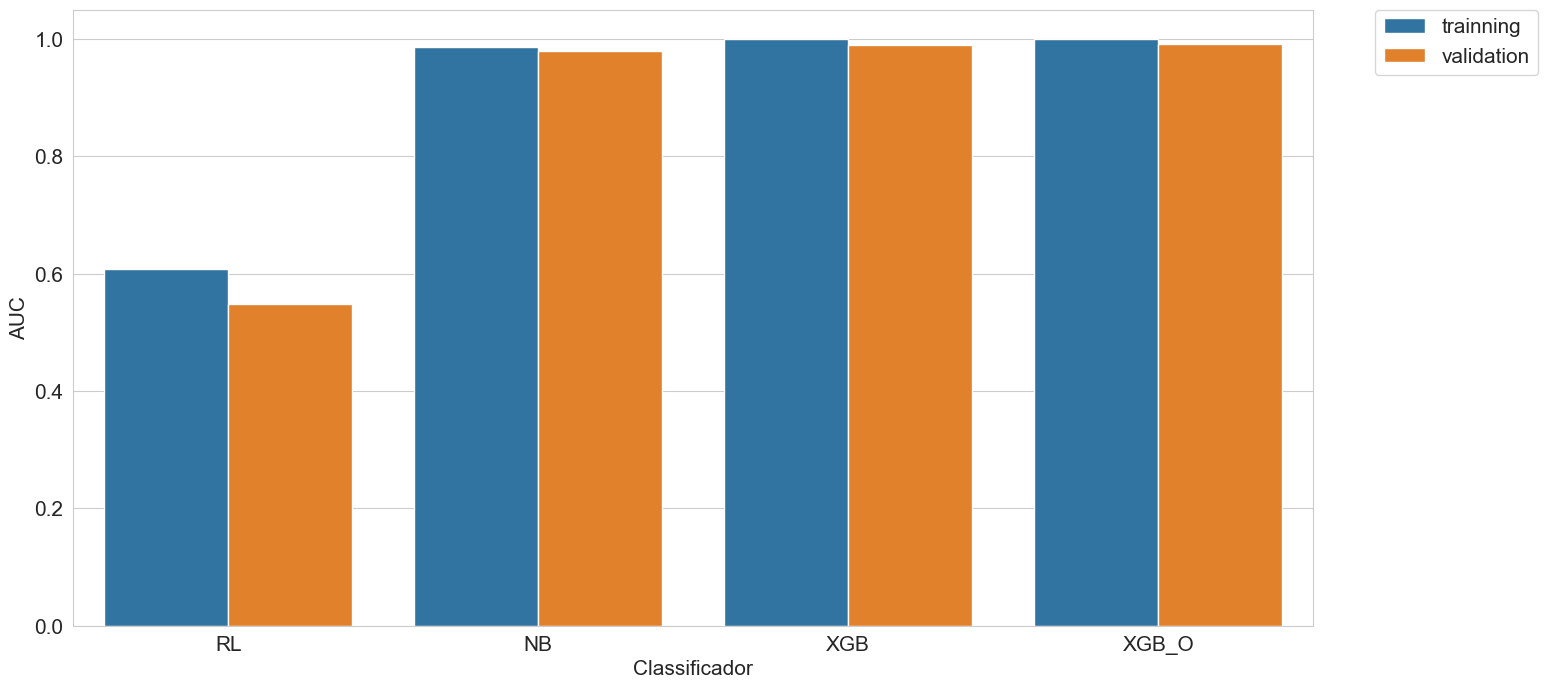

In [54]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Barplot
ax = sns.barplot(x = 'Classifier', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Subtitles
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
plt.show();

In [55]:
# Comparing models
df_results

,Classifier,data_set,auc,accuracy,recall,precision,specificity
0,RL,trainning,0.607657,0.642502,0.518979,0.689256,0.766024
1,RL,validation,0.547859,0.688696,0.456897,0.313609,0.747277
2,NB,trainning,0.986086,0.942439,0.907281,0.975904,0.977598
3,NB,validation,0.979722,0.951884,0.908046,0.861035,0.962963
4,XGB,trainning,1.000000,1.000000,1.000000,1.000000,1.000000
5,XGB,validation,0.990499,0.957681,0.945402,0.859008,0.960784
6,XGB_O,trainning,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB_O,validation,0.991815,0.960580,0.945402,0.870370,0.964415


In [57]:
# Tabela de comparação dos modelos somente com métricas em validação e ordenado por AUC
df_results[df_results['data_set'] == 'validation'].sort_values(by = 'auc', ascending = False)

,Classifier,data_set,auc,accuracy,recall,precision,specificity
7,XGB_O,validation,0.991815,0.960580,0.945402,0.870370,0.964415
5,XGB,validation,0.990499,0.957681,0.945402,0.859008,0.960784
3,NB,validation,0.979722,0.951884,0.908046,0.861035,0.962963
1,RL,validation,0.547859,0.688696,0.456897,0.313609,0.747277


Based on result and AUC metric, the best model is the Classifier XGBoost Optimized.

In [58]:
# Saving best model
pickle.dump(model_v4, open('best_model.pkl', 'wb'), protocol = 4)

### Evaluation and checking metrics

In [69]:
# Loading model, columns and scaler
best_model = pickle.load(open('best_model.pkl', 'rb'))
cols_input = pickle.load(open('cols_input.sav', 'rb'))
scaler =pickle.load(open('scaler.sav', 'rb'))

# load dataset
df_train = pd.read_csv('train_dataset.csv')
df_valid = pd.read_csv('valid_dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

# Creatig Matrix X and Y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['target_variable'].values
y_valid = df_valid['target_variable'].values
y_test = df_test['target_variable'].values

# Applying 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [70]:
# Calculating preditions through probability
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [71]:
#Checking perfom
thresh = 0.5

print('\nTrainning:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid, y_valid_preds, thresh)


print('\nTest:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test, y_test_preds, thresh)


Trainning:

AUC:0.992
Accuracy:0.961
Recal:0.945
Precision:0.870
Specificity:0.964


Test:

AUC:0.993
Accuracy:0.964
Recal:0.954
Precision:0.877
Specificity:0.967



#### ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical tool used to evaluate the performance of binary classification models. It is plotted using the true positive rate (sensitivity) against the false positive rate (specificity) for different cutoff points. Essentially, the ROC curve shows how well the model is able to distinguish between two classes (e.g. positive and negative).

The curve can help in choosing the most appropriate cutoff point, which balances capturing the maximum number of true positives while minimizing false positives. One of the most commonly used indicators to measure the quality of a model based on the ROC curve is the area under the curve (AUC). An AUC of 1.0 represents a perfect model, while an AUC of 0.5 indicates performance no better than chance.

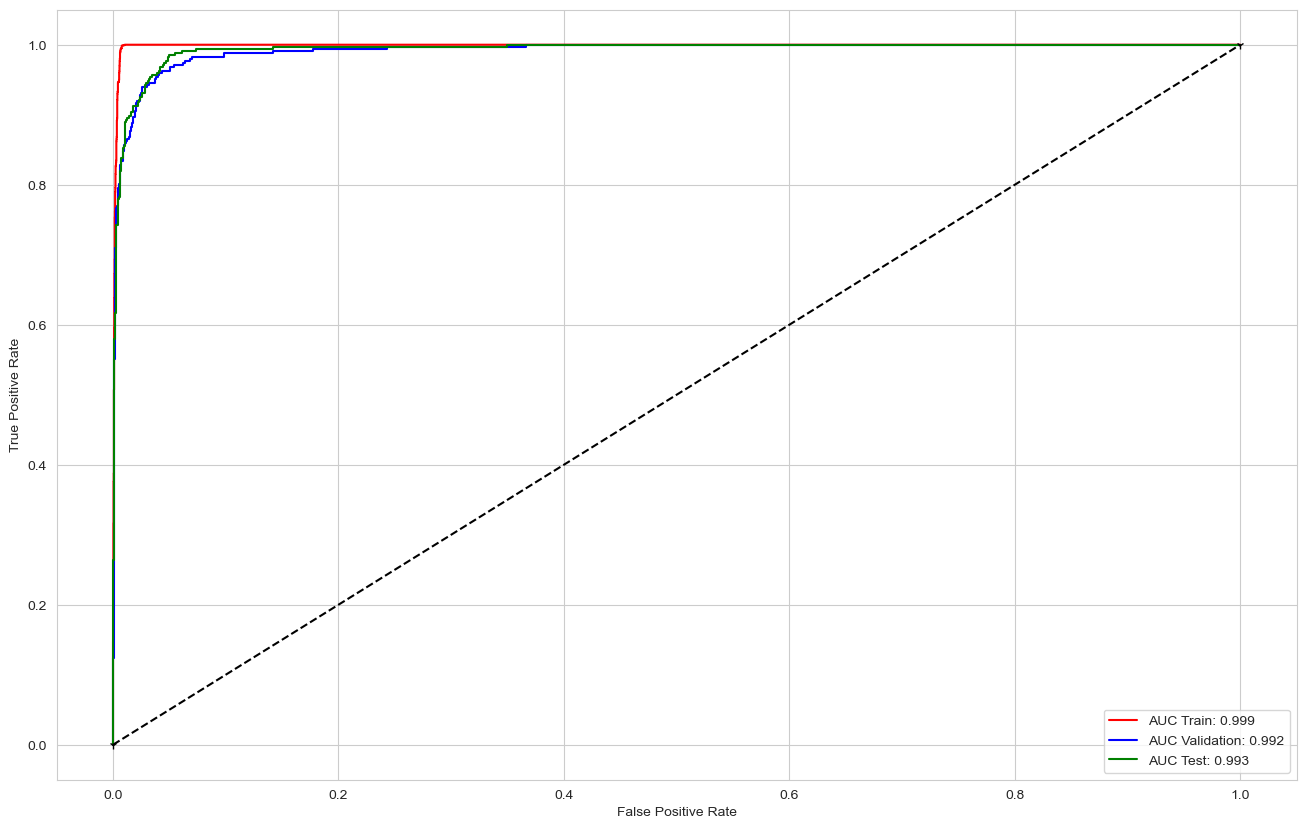

In [84]:
# Calculating ROC curve for train dataset
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calculating ROC curve for validation dataset
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calculating ROC curve for test datset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot

plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC Train: %.3f'% auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC Validation: %.3f'% auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC Test: %.3f'% auc_test)
plt.plot([0,1],[0,1],'1k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Deploy and using new data

In [79]:
# Load new data of a new machine (not used before)
new_machine = pd.read_csv('new_data.csv')

In [80]:
new_machine.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [81]:
# Applying standardization for new data
new_machine_scaled = scaler.transform(new_machine)

C:\Users\Elisa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [82]:
new_machine_scaled

array([[ 0.2989238 ,  0.25729926,  0.21312589,  0.14393314,  0.09292314,
         0.07348356,  0.04028097,  0.03188829,  0.0146345 , -0.01638206,
        -0.06289009, -0.09682119, -0.10811527, -0.09734583, -0.06918762,
        -0.05333555, -0.05241357, -0.06158127, -0.04951774, -0.04711707,
        -0.06793939, -0.04365624, -0.01226882,  0.00882946,  0.0122272 ,
         0.01774845,  0.04309674,  0.06311126,  0.08743991,  0.08067011,
         0.06237814,  0.01343702,  0.00129145, -0.01348964,  0.00769671,
         0.03177923,  0.06588953,  0.10556758,  0.12558161,  0.16341563,
         0.1750718 ,  0.18934908,  0.18036723,  0.19584866,  0.19061953,
         0.18478952,  0.17315333,  0.13067355,  0.06822518,  0.02019806,
         0.00668434, -0.04636279, -0.09767171, -0.13971598, -0.16362269,
        -0.17969892, -0.18288035, -0.18478512, -0.17798489, -0.13775089,
        -0.09687017, -0.05632734, -0.01850099, -0.03452237, -0.01996303,
        -0.00972509,  0.0068219 ,  0.05327976,  0.0

In [83]:
best_model.predict(new_machine_scaled)

array([0])

According to the data from IoT sensors and the prediction model created, this machine does not need maintenance.